<a href="https://colab.research.google.com/github/Vikaas1517/Unsupervised-Learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [4]:
data

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
print("Missing values in each column:")
data.isnull().sum()

Missing values in each column:


,0
CustomerID,0
Genre,0
Age,0
Annual_Income_(k$),0
Spending_Score,0


In [7]:
print("Information about the dataset:")
data.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
print("Descriptive statistics for the dataset:")
data.describe()

Descriptive statistics for the dataset:


,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


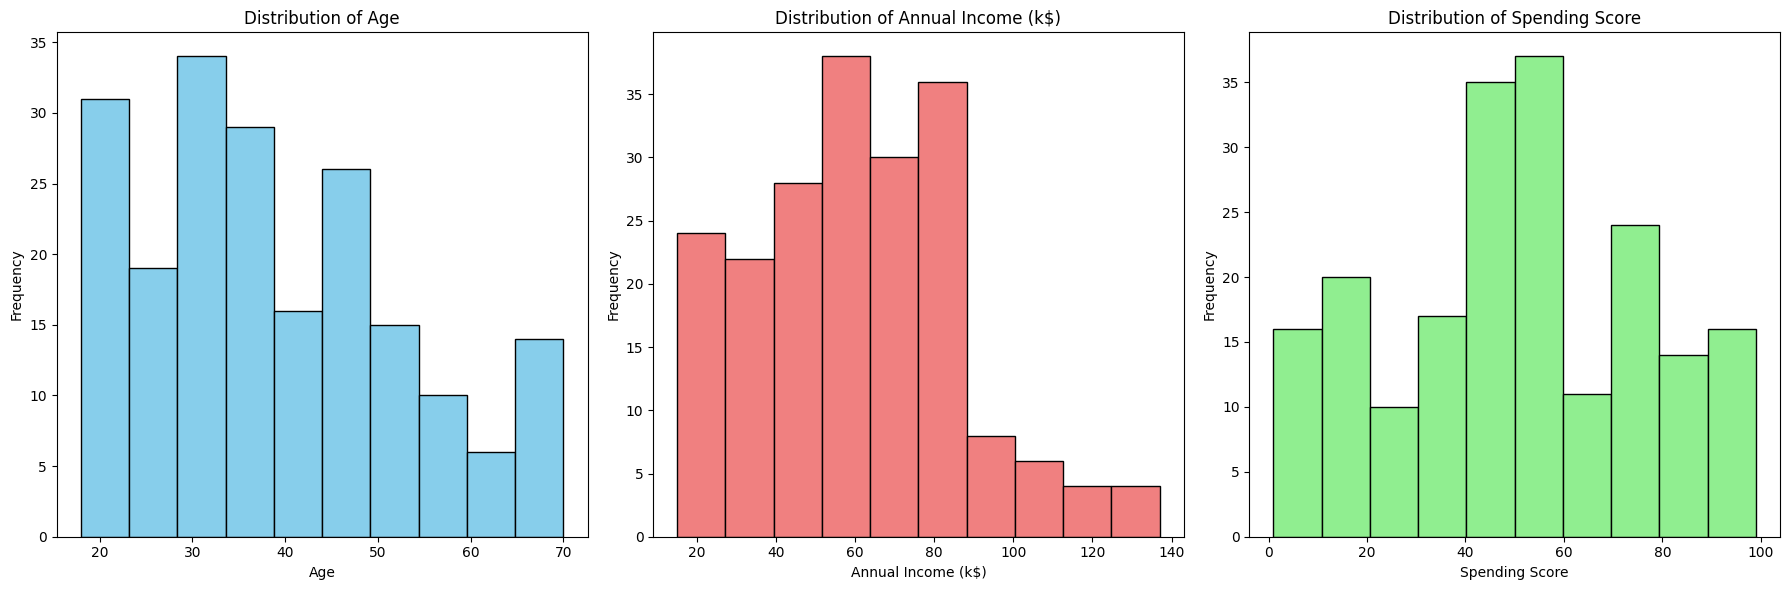

In [9]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(data['Age'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['Annual_Income_(k$)'], bins=10, edgecolor='black', color='lightcoral')
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['Spending_Score'], bins=10, edgecolor='black', color='lightgreen')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

# Select the 'Annual_Income_(k$)' and 'Spending_Score' columns
X = data[['Annual_Income_(k$)', 'Spending_Score']]

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the selected features and then transform them
X_scaled = scaler.fit_transform(X)

print("First 5 rows of the scaled data:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

First 5 rows of the scaled data:
   Annual_Income_(k$)  Spending_Score
0           -1.738999       -0.434801
1           -1.738999        1.195704
2           -1.700830       -1.715913
3           -1.700830        1.040418
4           -1.662660       -0.395980


In [16]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

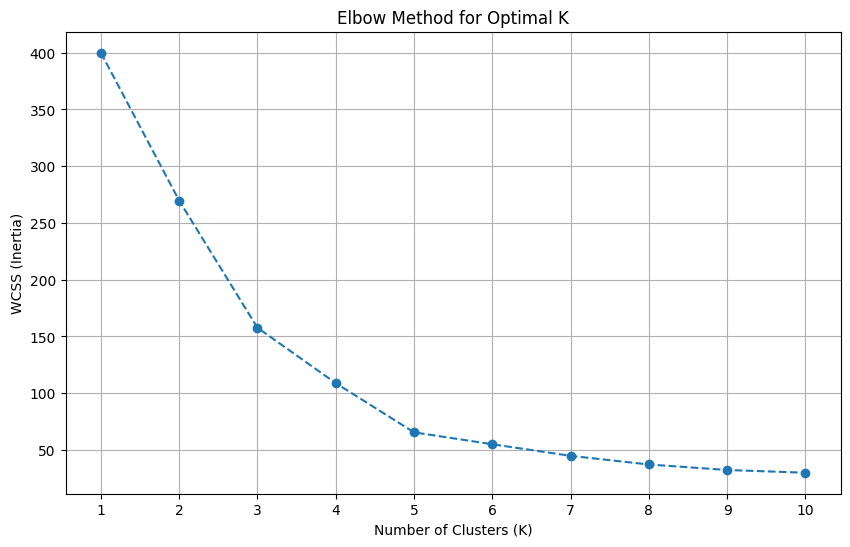

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)

kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_

cluster_centers_scaled = kmeans.cluster_centers_

cluster_centers_original_scale = scaler.inverse_transform(cluster_centers_scaled)

print(data.head())
print(pd.DataFrame(cluster_centers_original_scale, columns=X.columns))

   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score  Cluster
0           1    Male   19                  15              39        4
1           2    Male   21                  15              81        2
2           3  Female   20                  16               6        4
3           4  Female   23                  16              77        2
4           5  Female   31                  17              40        4
   Annual_Income_(k$)  Spending_Score
0           55.296296       49.518519
1           86.538462       82.128205
2           25.727273       79.363636
3           88.200000       17.114286
4           26.304348       20.913043


/tmp/ipython-input-3992347940.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], label=f'Cluster {i}', c=plt.cm.viridis(i/len(cluster_centers_original_scale)))


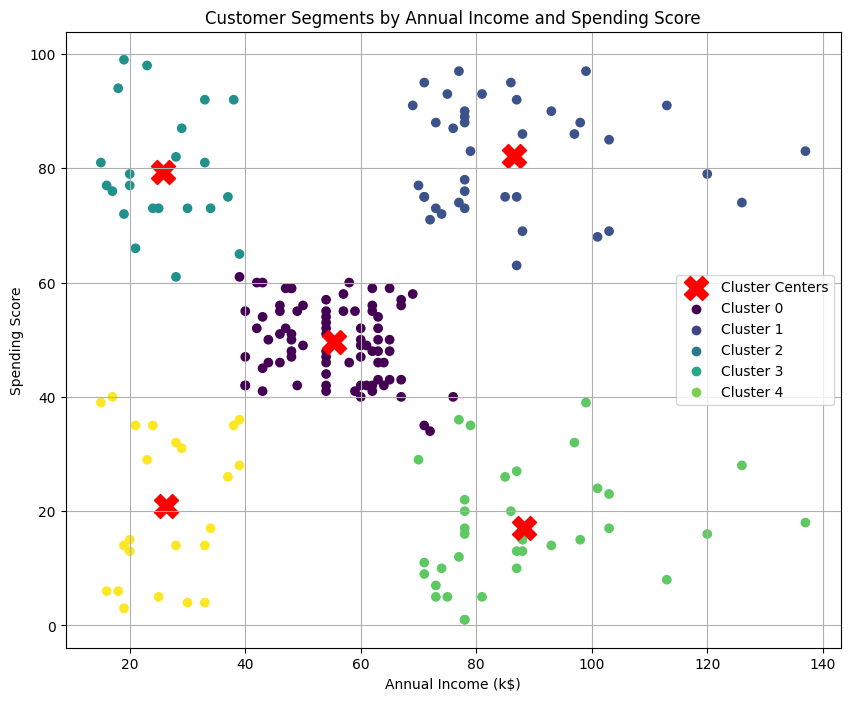

In [14]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c=data['Cluster'], cmap='viridis', label='_nolegend_')

plt.scatter(cluster_centers_original_scale[:, 0], cluster_centers_original_scale[:, 1],
            s=300, marker='X', color='red', label='Cluster Centers')

for i in range(len(cluster_centers_original_scale)):
    plt.scatter([], [], label=f'Cluster {i}', c=plt.cm.viridis(i/len(cluster_centers_original_scale)))

plt.title('Customer Segments by Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()

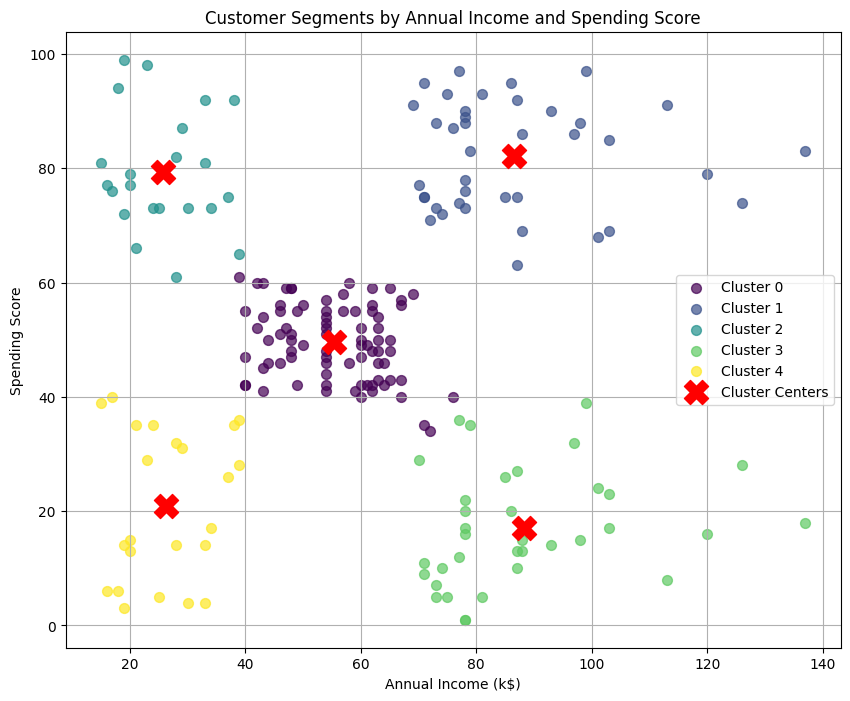

In [15]:
plt.figure(figsize=(10, 8))

unique_clusters = sorted(data['Cluster'].unique())

for cluster_id in unique_clusters:
    cluster_data = data[data['Cluster'] == cluster_id]
    color_val = plt.cm.viridis(cluster_id / max(unique_clusters)) if unique_clusters else plt.cm.viridis(0)
    plt.scatter(cluster_data['Annual_Income_(k$)'], cluster_data['Spending_Score'],
                color=color_val,
                label=f'Cluster {cluster_id}',
                s=50, alpha=0.7)

plt.scatter(cluster_centers_original_scale[:, 0], cluster_centers_original_scale[:, 1],
            s=300, marker='X', color='red', label='Cluster Centers', zorder=10) # zorder ensures centers are visible on top

plt.title('Customer Segments by Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()